In [ ]:
# # http://vis-www.cs.umass.edu/lfw/
# # Uncompress Tar GZ Labelled Faces in the Wild Dataset
# !tar -xf lfw.tgz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/AI_Project_Files/Face_ID/data.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
# %pip list


In [ ]:
# %pip install tensorflow

In [ ]:

import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import keras


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten


In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
# if you are starting this for the first time, then first download the data in gzip format from the site below adn unzip it using the command given below

# # http://vis-www.cs.umass.edu/lfw/
# # Uncompress Tar GZ Labelled Faces in the Wild Dataset
# !tar -xf lfw.tgz

#Create a new folder named lfwNew, then run the commands below. And for running the remaining cells change lfw to lfwNew wherever it is written.


# # Move LFW Images to the following repository data/negative
# for directory in os.listdir('lfw'):
#     for file in os.listdir(os.path.join('lfw', directory)):
#         EX_PATH = os.path.join('lfw', directory, file)
#         NEW_PATH = os.path.join('lfwNew', file)
#         os.replace(EX_PATH, NEW_PATH)


# Collecting Data

In [ ]:
# Making positive,negative and anchor from the lfw dataset

folder_path = os.path.join('data', 'lfw')

file_list = os.listdir(folder_path)

set_names_of_people=list()

for files in file_list:
    sample=str(files)

    i=len(sample)-1
    while(i>=0):
        if(sample[i]=='_'):
            break
        i-=1

    name=str(sample[:i])

    set_names_of_people.append(name)

names_of_people=list(set(set_names_of_people))

In [ ]:
image_files=dict()     #contains the name of person and list of all his images

for name in names_of_people:
    image_files[name]=list()  #initializing all the list to be empty

In [ ]:
# Now adding all the files to their respective list

for files in file_list:
    sample = str(files)  # getting the file name

    i = len(sample)-1
    while (i >= 0):
        if (sample[i] == '_'):
            break
        i -= 1
    name = str(sample[:i])  # getting the key name

    image_files[name].append(files)

# Now all the images belonging to the same person are part of the list belonging to the name of the person in the dictionary


In [ ]:
import random
import uuid


In [ ]:
# # Now using the above dictionary we have to divide them into positive, anchors, negatives

# # Positive and Anchors can be made from those names which have more than one images belonging to it, one of the many images can go to anchor and the other one can go to positives.
# # As for negatives we will simply chose any image from any other list (other than the one we chose our anchor from)


# def copying_file(source_path, destination_folder, name_):
#     destination_file_path = os.path.join(
#         destination_folder, str(name_)+"_"+str(uuid.uuid1())+".jpg")
#     # os.path.basename will get the name of source file out of the whole file path
#     # adding randomness at the end of file name using uuid ->the reason for this is that when I am adding a image in negative folder I am generating a random index to get a random image, but it might happen for two different images the same random number might be getting generated, and therefore the image which will come the second time will be identical to earlier ones and might replace it and therefore number of images in negative folder might be less than positive and negative folder

#     # Open the source file for reading
#     with open(source_path, 'rb') as source_file:
#         # Open the destination file for writing
#         with open(destination_file_path, 'wb') as destination_file:
#             # Read from the source file and write to the destination file
#             destination_file.write(source_file.read())


In [ ]:
# def apply_augmentation(image_path, augmentations):
#     image = cv2.imread(image_path)
#     augmented_image = image.copy()

#     for augmentation in augmentations:
#         if augmentation == 'flip_horizontal':
#             augmented_image = cv2.flip(augmented_image, 1)
#         elif augmentation == 'flip_vertical':
#             augmented_image = cv2.flip(augmented_image, 0)
#         elif augmentation == 'rotate':
#             angle = random.randint(0, 360)
#             rotation_matrix = cv2.getRotationMatrix2D(
#                 (image.shape[1] / 2, image.shape[0] / 2), angle, 1)
#             augmented_image = cv2.warpAffine(
#                 augmented_image, rotation_matrix, (image.shape[1], image.shape[0]))
#         elif augmentation == 'brightness':
#             brightness_factor = random.uniform(0.5, 1.5)
#             augmented_image = cv2.convertScaleAbs(
#                 augmented_image, alpha=brightness_factor, beta=0)
#         elif augmentation == 'contrast':
#             contrast_factor = random.uniform(0.5, 1.5)
#             augmented_image = cv2.convertScaleAbs(
#                 augmented_image, alpha=1, beta=128 * (1 - contrast_factor))
#         elif augmentation == 'noise':
#             noise = np.random.normal(
#                 0, 25, augmented_image.shape).astype(np.uint8)
#             augmented_image = cv2.add(augmented_image, noise)

#     return augmented_image


In [ ]:
data_files_dict=dict()
lfw_path = os.path.join('data', 'lfw')
for name in names_of_people:
    if (len(image_files[name]) > 1):
        data_files_dict[name]=[]

for name in names_of_people:
    if (len(image_files[name]) > 1):
        data_files_dict[name].append(os.path.join(str(lfw_path), str(image_files[name][0])))
        data_files_dict[name].append(os.path.join(str(lfw_path), str(image_files[name][1])))

        random_index = random.randint(0, len(names_of_people)-1)
        while (str(names_of_people[random_index]) == str(name)):
            random_index = random.randint(0, len(names_of_people)-1)
        # if(str(names_of_people[random_index])==str(name)):
        data_files_dict[name].append(os.path.join(
            str(lfw_path), str(image_files[names_of_people[random_index]][0])))


In [ ]:
def get_base_name(file_name):
    sample = str(file_name)
    i = len(sample)-1
    while (i >= 0):
        if (sample[i] == '_'):
            break
        i -= 1
    name_sample = str(sample[:i])

    return name_sample


In [ ]:
count = 0
for name in names_of_people:
    if (len(image_files[name]) > 1):
        if (str(get_base_name(data_files_dict[name][0])) == str(get_base_name(data_files_dict[name][2]))):
            count += 1

print(count)


0


In [ ]:
# Now generated the augmented versions of these images
augmentation=['flip_horizontal','flip_vertical','rotate','brightness','contrast','noise']

# Creating Labelled Dataset

In [ ]:
size=70

In [ ]:
def preprocess(file_path,augmentation=False):

    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)

    img = tf.image.resize(img, (size, size))
    # Scale image to be between 0 and 1
    img = img / 255.0

    if(augmentation):
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_brightness(img, max_delta=0.2)
        img = tf.image.random_contrast(img, lower=0.5, upper=1.5)


    return img


In [ ]:
data_augmentation_rate=5

In [ ]:
anchor_list = []
pos_list = []
neg_list = []
ones_list = []
zeroes_list = []

for name in names_of_people:
    if (len(image_files[name]) > 1):
        anchor_list.append(preprocess(data_files_dict[name][0]))
        pos_list.append(preprocess(data_files_dict[name][1]))
        neg_list.append(preprocess(data_files_dict[name][2]))
        ones_list.append(1)
        zeroes_list.append(0)

        for i in range(data_augmentation_rate):

            anchor_list.append(preprocess(data_files_dict[name][0],True))
            pos_list.append(preprocess(data_files_dict[name][1],True))
            neg_list.append(preprocess(data_files_dict[name][2], True))
            ones_list.append(1)
            zeroes_list.append(0)



In [ ]:
print(len(anchor_list))
print(len(pos_list))
print(len(neg_list))
print(len(ones_list))
print(len(zeroes_list))


10080
10080
10080
10080
10080


Anchor Image: 


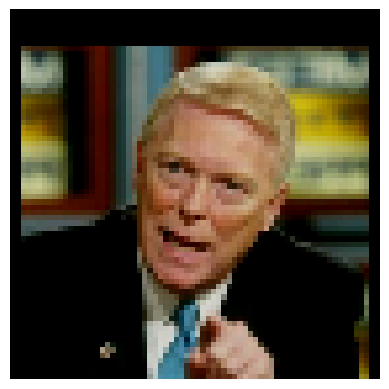

Positive Image: 


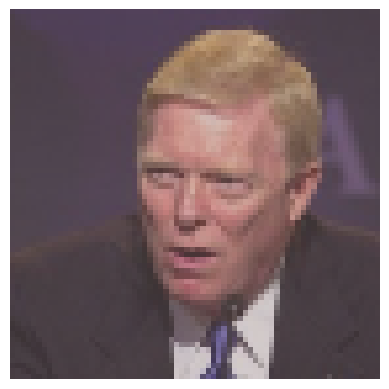

Negative Image: 


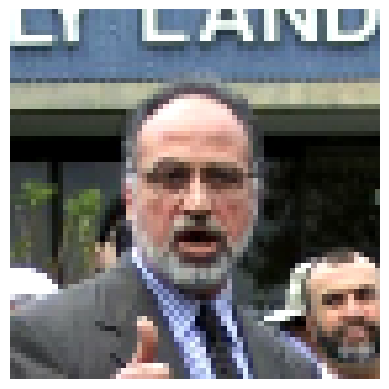

In [ ]:
i=random.randint(0,len(anchor_list)-1)

print("Anchor Image: ")
plt.imshow(anchor_list[i])
plt.axis('off')  # Turn off axis labels
plt.show()


print("Positive Image: ")
plt.imshow(pos_list[i])
plt.axis('off')  # Turn off axis labels
plt.show()


print("Negative Image: ")
plt.imshow(neg_list[i])
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
anchor_pos=list(zip(anchor_list,pos_list))
anchor_neg=list(zip(anchor_list,neg_list))

In [ ]:
dataset_list=anchor_pos+anchor_neg
y_list=ones_list+zeroes_list

In [ ]:
dataset_list[0]


(<tf.Tensor: shape=(70, 70, 3), dtype=float32, numpy=
 array([[[0.81960785, 0.76862746, 0.59327734],
         [0.81960785, 0.76862746, 0.59607846],
         [0.8212885 , 0.77030814, 0.60560226],
         ...,
         [0.8487395 , 0.7977591 , 0.6722689 ],
         [0.85882354, 0.80784315, 0.68235296],
         [0.85770303, 0.80672264, 0.68123245]],
 
        [[0.81960785, 0.76862746, 0.59607846],
         [0.81960785, 0.76862746, 0.59607846],
         [0.8212885 , 0.77030814, 0.60560226],
         ...,
         [0.8487395 , 0.7977591 , 0.6722689 ],
         [0.85882354, 0.80784315, 0.68235296],
         [0.85770303, 0.80672264, 0.68123245]],
 
        [[0.81960785, 0.76862746, 0.6039216 ],
         [0.81960785, 0.76862746, 0.6039216 ],
         [0.81960785, 0.76862746, 0.6039216 ],
         ...,
         [0.8487395 , 0.7977591 , 0.6722689 ],
         [0.85882354, 0.80784315, 0.68235296],
         [0.85770303, 0.80672264, 0.68123245]],
 
        ...,
 
        [[0.922689  , 0.8896358 , 

In [ ]:
print(len(zeroes_list))
print(len(ones_list))
print(len(anchor_neg))
print(len(anchor_pos))


10080
10080
10080
10080


In [ ]:
print(len(dataset_list))
print(len(y_list))


20160
20160


In [ ]:
temp = list(zip(dataset_list, y_list))
random.shuffle(temp)

dataset_list, y_list = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
dataset_list, y_list = list(dataset_list), list(y_list)


In [ ]:
# Normalizing data
min_val = np.min(dataset_list)
max_val = np.max(dataset_list)

# Step 3: Normalize the array
dataset_list = (dataset_list - min_val) / (max_val - min_val)


In [ ]:
dataset_list_anc, dataset_list_valid = zip(*dataset_list)
dataset_list_anc, dataset_list_valid = list(
    dataset_list_anc), list(dataset_list_valid)


In [ ]:
# dataset_list_anc=np.array(dataset_list_anc)
# print(dataset_list_anc.shape)


In [ ]:
print(len(dataset_list_anc))
print(len(dataset_list_valid))


20160
20160


In [ ]:
print(y_list[:20])


[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]


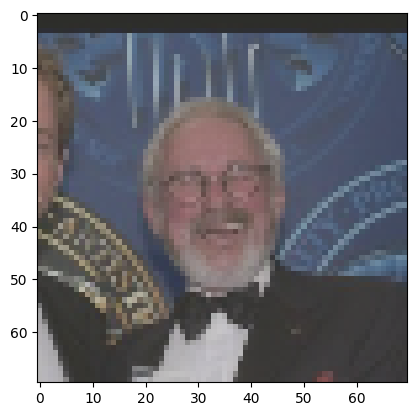

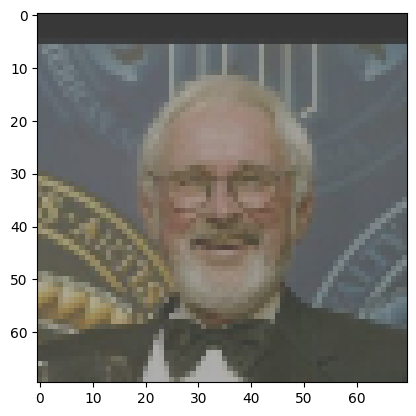

1


In [ ]:
from matplotlib import pyplot as plt

x = 3
plt.imshow(dataset_list[x][0], interpolation='nearest')
plt.show()

plt.imshow(dataset_list[x][1], interpolation='nearest')
plt.show()

print(y_list[x])


In [ ]:
print(dataset_list[0])


[[[[0.4799778  0.4523885  0.4252692 ]
   [0.4776393  0.45059636 0.42609966]
   [0.48506996 0.45951316 0.4370489 ]
   ...
   [0.4068734  0.39289963 0.38328606]
   [0.40641445 0.3924407  0.3828271 ]
   [0.40610847 0.39213473 0.38252112]]

  [[0.48675278 0.46338147 0.4407861 ]
   [0.5518146  0.5300168  0.5093883 ]
   [0.52523905 0.50484    0.48512948]
   ...
   [0.4087092  0.39473546 0.38512185]
   [0.40733233 0.3933586  0.38374498]
   [0.40717936 0.3932056  0.383592  ]]

  [[0.5354016  0.51786554 0.50031865]
   [0.67199427 0.6576271  0.64248425]
   [0.66792923 0.6542615  0.6401676 ]
   ...
   [0.40855622 0.39458248 0.38496888]
   [0.40726677 0.39329305 0.38367945]
   [0.40674224 0.39276853 0.38315493]]

  ...

  [[0.57974505 0.44093654 0.4409609 ]
   [0.5858644  0.44659695 0.44662133]
   [0.5881154  0.44930696 0.4493313 ]
   ...
   [0.44109806 0.42498255 0.4164398 ]
   [0.43961188 0.4234964  0.41495368]
   [0.43058592 0.4144704  0.4059277 ]]

  [[0.57653236 0.43833584 0.4383602 ]
   [0.5

# Making the Neural Network and Training the Data

In [ ]:
def initial_layers():

    inp = Input(shape=(size, size, 3), name="Input_layer")

    conv1 = Conv2D(64, (10, 10), activation='relu', name="ConvOfBlock1")(inp)
    mp1 = MaxPooling2D(64, (2, 2), padding='same')(conv1)

    conv2 = Conv2D(128, (7, 7), activation='relu', name="ConvOfBlock2")(mp1)
    mp2 = MaxPooling2D(64, (2, 2), padding='same')(conv2)

    conv3 = Conv2D(128, (4, 4), activation='relu', name="ConvOfBlock3")(mp2)
    mp3 = MaxPooling2D(64, (2, 2), padding='same')(conv3)

    conv4 = Conv2D(256, (4, 4), activation='relu', name="ConvOfBlock4")(mp3)

    f1 = Flatten()(conv4)
    d1 = Dense(4096, activation='sigmoid')(f1)

    return Model(inputs=[inp], outputs=[d1], name="embedding")


In [ ]:
basic_layer=initial_layers()

In [ ]:
basic_layer.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 70, 70, 3)]       0         
                                                                 
 ConvOfBlock1 (Conv2D)       (None, 61, 61, 64)        19264     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 ConvOfBlock2 (Conv2D)       (None, 25, 25, 128)       401536    
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 ConvOfBlock3 (Conv2D)       (None, 10, 10, 128)       26

In [ ]:
class siamese(Layer):

   def __init__(self, **kwargs):
       super().__init__()

   def call(self, inp_model_processed, validation_model_processed):
      return tf.math.abs(inp_model_processed-validation_model_processed)


In [ ]:
def model():
    inp_image=Input(shape=(size,size,3),name="Input/AnchorImg")
    valid_image=Input(shape=(size,size,3),name="ValidationImg")

# ###############################################
#     conv1_anc=Conv2D(64,(10,10),activation='relu',name="ConvOfBlock1")(inp_image),
#     max_pool1_anc=MaxPooling2D(64,(2,2),padding='same',name="MP1")(conv1_anc),
#
#     conv2_anc=Conv2D(128, (7, 7), activation='relu', name="ConvOfBlock2")(max_pool1_anc),
#     max_pool2_anc=MaxPooling2D(64,(2,2),padding='same',name="MP2")(conv2_anc),
#
#     conv3_anc=Conv2D(128, (4, 4), activation='relu', name="ConvOfBlock3")(max_pool2_anc),
#     max_pool3_anc=MaxPooling2D(64, (2, 2), padding='same',name="MP3")(conv3_anc),
#
#     conv4_anc=Conv2D(256, (4, 4), activation='relu', name="ConvOfBlock4")(max_pool3_anc),
#
#     fl_anc=Flatten()(conv4_anc),
#     inp_data=Dense(4096, activation='softmax')(fl_anc)
#
# ###################################
#
#
# ###############################################
#     conv1_val=Conv2D(64,(10,10),activation='relu',name="ConvOfBlock1'")(valid_image),
#     max_pool1_val=MaxPooling2D(64,(2,2),padding='same',name="MP1'")(conv1_val),
#
#     conv2_val=Conv2D(128, (7, 7), activation='relu', name="ConvOfBlock2'")(max_pool1_val),
#     max_pool2_val=MaxPooling2D(64,(2,2),padding='same',name="MP2'")(conv2_val),
#
#     conv3_val=Conv2D(128, (4, 4), activation='relu', name="ConvOfBlock3'")(max_pool2_val),
#     max_pool3_val=MaxPooling2D(64, (2, 2), padding='same',name="MP3'")(conv3_val),
#
#     conv4_val=Conv2D(256, (4, 4), activation='relu', name="ConvOfBlock4'")(max_pool3_val),
#
#     fl_val=Flatten()(conv4_val),
#     valid_data=Dense(4096, activation='softmax')(fl_val)
#
# ###################################


    L1layer=siamese()

    distance = L1layer(basic_layer(inp_image),basic_layer(valid_image))

    last_layer=Dense(1,activation='sigmoid')(distance)

    return Model(inputs=[inp_image,valid_image],outputs=[last_layer],name="SiamesesNeuralNetwork")

In [ ]:
snn=model()

In [ ]:
snn.summary()


Model: "SiamesesNeuralNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input/AnchorImg (InputLaye  [(None, 70, 70, 3)]          0         []                            
 r)                                                                                               
                                                                                                  
 ValidationImg (InputLayer)  [(None, 70, 70, 3)]          0         []                            
                                                                                                  
 embedding (Functional)      (None, 4096)                 5406016   ['Input/AnchorImg[0][0]',     
                                                                     'ValidationImg[0][0]']       
                                                                              

In [ ]:
snn.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [ ]:
end_ind=int((0.7)*len(dataset_list_anc))

In [ ]:
snn.fit(
    [np.array(dataset_list_anc[0:end_ind]), np.array(
        dataset_list_valid[0:end_ind])], np.array(y_list[0:end_ind]),batch_size=256,
    epochs=5)


In [ ]:
end_ind_cross_valid=int((0.85)*len(dataset_list_anc))

In [ ]:
cross_valid_loss, cross_valid_acc = snn.evaluate([np.array(dataset_list_anc[end_ind:end_ind_cross_valid]), np.array(
    dataset_list_valid[end_ind:end_ind_cross_valid])],  np.array(y_list[end_ind:end_ind_cross_valid]), verbose=1)

print('Cross Validation accuracy:', cross_valid_acc)
#for tuning of hyperparameters

95/95 [==============================] - 15s 155ms/step - loss: 0.6945 - accuracy: 0.5033
Cross Validation accuracy: 0.5033068656921387


In [ ]:
#for reporting final accurcay
test_loss, test_acc = snn.evaluate([np.array(dataset_list_anc[end_ind_cross_valid:]), np.array(
    dataset_list_valid[end_ind_cross_valid:])],  np.array(y_list[end_ind_cross_valid:]), verbose=1)

print('Test accuracy:', test_acc)

95/95 [==============================] - 15s 155ms/step - loss: 0.6964 - accuracy: 0.5003
Test accuracy: 0.5003306865692139


In [ ]:
snn.save()

TypeError: ignored